In [1]:
from numpy import matrix
from numpy import ones
from numpy import shape
from numpy import mat
from numpy import zeros
from numpy import inf

from numpy import exp,log
import numpy as np
import matplotlib.pyplot as plt

from numpy import multiply,sign

from pandas import DataFrame

In [2]:
def loadSimpleData():
    dataMat = matrix([[1.,2.1],[2.,1.1],[1.3,1.],[1.,1.],[2.,1.],])
    classLabels = [1.0,1.0,-1.0,-1.0,1.0]
    return dataMat, classLabels

datMat , classLabels = loadSimpleData()

datMat

In [31]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    retArray = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray

stumpClassify(datMat,0,1.5,'lddt')

In [13]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr);
    labelMat = mat(classLabels).T
    m,n =shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClassEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min();rangeMax = dataMatrix[:,i].max();
        StepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal = rangeMin +float(j)*StepSize
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = mat(ones((m,1)))                                          
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T * errArr
                #print('split:dim %d, thresh %.2f, thresh ineneqal: %s the weighted error is %.3f'%\
                     #(i,threshVal,inequal,weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClassEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
                    #print(bestStump,minError)
    return bestStump, minError, bestClassEst

buildStump(datMat,classLabels,D)

/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


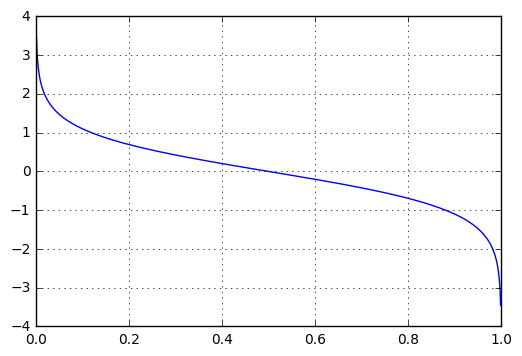

In [5]:
X =np.linspace(0,1,1000)

Y = 0.5*log((1-X)/X)

A = plt.plot(X,Y,'-')

plt.grid(True)

plt.show()

In [22]:
def addBoostTrainDS(datMat,classLabels,numIt=40):
    weakClassErr = []
    m = shape(datMat)[0]
    D = mat(ones((m,1))/m)
    aggClassEst = mat(zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(datMat,classLabels,D)
        #print('D:',D.T)
        alpha = float(0.5*log((1-error)/max(error,1e-16)))
        bestStump['alpha'] = alpha
        weakClassErr.append(bestStump)
        #print("classEst: ", classEst.T)
        expon = multiply(-1*alpha*mat(classLabels).T,classEst)
        D = multiply(D,exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
        #print('aggClassEst: ',aggClassEst.T)
        aggError = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggError.sum()/m
        print("total error: ",errorRate,'\n')
        if errorRate == 0.0:
            break
    return weakClassErr


classifierArr = addBoostTrainDS(datMat,classLabels,9)

In [23]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

adaClassify([[0,0],[5,5]],classifierArr)

In [24]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [25]:
datArr , labelArr = loadDataSet('horseColicTraining2.txt')

In [30]:
datArr

[[2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 9.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 9.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 9.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 9.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 9.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 9.0],
 [1.0, 1.0],
 [2.0, 9.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 9.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 9.0],
 [1.0, 9.0],
 [1.0, 1.0],

In [33]:
classifierArray = addBoostTrainDS(datArr,labelArr,50)

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 

total error:  1.0 



/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp
/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


In [35]:
xx = [x for x,y in datArr]

In [36]:
yy = [y for x,y in datArr]

In [49]:
plt.plot(xx,yy,'*')

In [50]:
plt.grid(True)

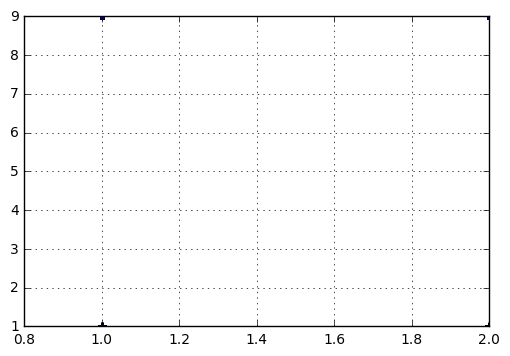

In [51]:
plt.show()

In [48]:
datArr[:10]

[[2.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [1.0, 9.0],
 [2.0, 1.0],
 [2.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [2.0, 9.0]]